In [2]:
#[goal]
#the goal is to compare the performance of the classification including 
#a) k-nearest neighbors
#b) logistic regression
#c) decision trees
#d) support vector machine

#[Understand the business problem]
#we are going to use the above 4 models to find the model that is best to predict whether a client 
#will subscribe a term deposit

#[Analysis]
# teh confusion matrix suggested that we should use logistic regression model 
# to predict the subscription of a term deposit
#as value is 0.8827 which is the highest number, this also means the accuracy rate of
#this model is 88.72%, this is based on the test dataset of 31646 rows. 
#As the accuracy rate of the predict model is high, we would expect this model to be ready
# to be used in production environment

In [3]:
#[understanding the data]
#the dataset i am using is coming from UCI Machine Learning Repository. The data is from a Portuguese banking
#institution and is a collection of the results of multiple marketing campigns. 
#load the file from csv and assign to dataframe df
import pandas as pd
df = pd.read_csv ('data/bank-full.csv', sep=';')

In [4]:
#[understanding the data]
#show the dataframe df first 5 rows, it has 17 columns
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#[understanding the data]
#learn the datatype per each column of the dataframe
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#[understanding the data]
# check the datatype of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='duration', ylabel='balance'>

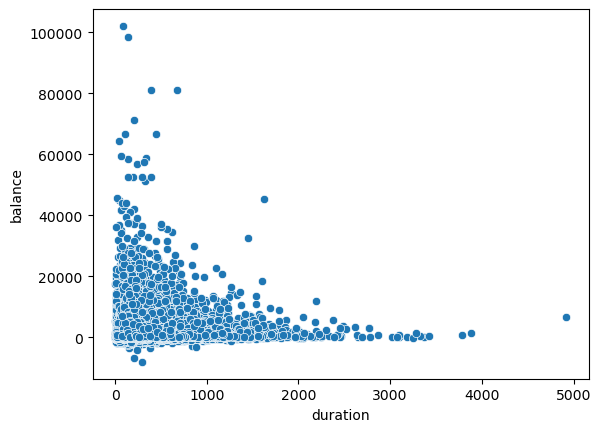

In [7]:
#[understanding the data]
#show scatter plot of column duration and balance, we want to know the distribution
import seaborn as sns
sns.scatterplot(x="duration",y="balance",data=df)

In [8]:
#[understand the data]
#get the max and min of balance and duration
balance_min = df['balance'].min()
balance_max = df['balance'].max()
duration_min = df['duration'].min()
duration_max = df['duration'].max()
print('balance min :' ,balance_min)
print('balance max :' ,balance_max)
print('duration min :',duration_min)
print('duration max :', duration_max)

balance min : -8019
balance max : 102127
duration min : 0
duration max : 4918


In [9]:
#[understanding the data]
#we want to know the unique data per column
print('-------job--------')
print('type of job')
print(df['job'].unique())  
print(df.job.value_counts())

print('-------marital--------')
print(df['marital'].unique())  
#print(df.martial.value_counts())

print('-------education--------')
print(df['education'].unique())  
print(df.education.value_counts())

print('-------default--------')
print('has credit card')
print(df['default'].unique())  
print(df.default.value_counts())

print('-------balance-------')
print(df['balance'].unique())  
print(df.balance.value_counts())

print('-------housing-------')
print('has housing loan')
print(df['housing'].unique())  
print(df.housing.value_counts())

print('-------loan-------')
print(df['loan'].unique())  
print(df.loan.value_counts())

print('-------contact-------')
print(df['contact'].unique())  
print(df.contact.value_counts())

print('-------campaign-------')
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
print(df['campaign'].unique())  
print(df.campaign.value_counts())

-------job--------
type of job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-------marital--------
['married' 'single' 'divorced']
-------education--------
['tertiary' 'secondary' 'unknown' 'primary']
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
-------default--------
has credit card
['no' 'yes']
no     44396
yes      815
Name: default, dtype: int64
-------balance-------
[ 2143    29     2 ...  8205 14204 16353]
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584    

In [181]:
#[understand the data]
#this continue to understand the unique data per each column
print('-------pdays-------')
# pdays: number of days that passed by after the client was last contacted from 
# a previous campaign (numeric; 999 means client was not previously contacted)
print(df['pdays'].unique())  
#print(df.pdays.value_counts())

print('-------previous-------')
# previous: number of contacts performed before this campaign and for this client (numeric)
print(df['previous'].unique())  
#print(df.previous.value_counts())

print('-------poutcome-------')
#poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
print(df['poutcome'].unique())  
print(df.poutcome.value_counts())

print('-------y------')
#has the client subscribed a term deposit? (binary: 'yes','no')
print(df['y'].unique())  
print(df.y.value_counts())

-------pdays-------
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259
 241 260 234 251 225 161 237 262 248 255 220 227 206 224 249 235 228 263
   2 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 271 203
 221 202 216 201 257 229 210 217  75 213  73  76 267 211 215  77 236  82
   6 209 274   1 243 212 275  80 276   9 279  12 280  88 277  85  84 219
  24  21 282  41 294  49 329 307 303 331 308 300  64 314 287 330 332 302
 323 318 333  60 326 335 313 31

In [10]:
#[preparing the data]
#create a new mirror dataframe df2
df2 = df
#[make a new column subcribed to replace column y, y is not meaningful enough to explain what we are looking for]
df2['subscribed'] = df2.loc[:, 'y']
df2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no


In [11]:
#[preparing the data]
#we make the trageted dataframe to X1a and y1a, X1a is for features and Y1a is label for prediction
X1a = df2[['balance','duration','age','previous','marital','education','loan']]
y1a = df2['subscribed']
X1a.columns

Index(['balance', 'duration', 'age', 'previous', 'marital', 'education',
       'loan'],
      dtype='object')

In [12]:
#[preparing the data]
X1a.head(5)

,balance,duration,age,previous,marital,education,loan
0,2143,261,58,0,married,tertiary,no
1,29,151,44,0,single,secondary,no
2,2,76,33,0,married,secondary,yes
3,1506,92,47,0,married,unknown,no
4,1,198,33,0,single,unknown,no


In [13]:
#[preparing the data]
#we did a column rearrangement for dataframe X1a so that numberic features are occupied first 4 columns and 
#categorical features are occupied for last 3 columns, this is the preparation of transformation
X1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   balance    45211 non-null  int64 
 1   duration   45211 non-null  int64 
 2   age        45211 non-null  int64 
 3   previous   45211 non-null  int64 
 4   marital    45211 non-null  object
 5   education  45211 non-null  object
 6   loan       45211 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.4+ MB


In [14]:
#[preparing the data]
#we split our dataset into training set and test set, we set the test percentage to 30%
from sklearn.model_selection import train_test_split
X_train1a, X_test1a, y_train1a, y_test1a = '', '', '', ''
X_train1a, X_test1a, y_train1a, y_test1a = train_test_split(X1a, y1a, test_size=0.3, random_state=22)

In [15]:
#[preparing the data]
#we are going to conduct scaling for all numeric columns, that is for normalizing the range
# of features in a dataset so that they are on the same scale 
#we are also going to do one-hot encoding for the last three columns marital, educaiton and loan
# as they are categorical features
#we will conduct scaling and OHE for both train and test dataset separately to ensure
#no data leaking from train dataset to test dataset. We would like to ensure the models 
#preduction won't affect the accuracy of test dataset
numeric_feats = ['balance', 'duration', 'age', 'previous']  # apply scaling
categorical_feats = ['marital','education','loan']  # apply one-hot encoding

In [16]:
#[preparing the data]
#we call make_column_transfer 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    
)

In [17]:
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['balance', 'duration', 'age', 'previous']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['marital', 'education', 'loan'])])

In [18]:
#[preparing the data]
#we call fit transform for scaling
train_transformed = ct.fit_transform(X_train1a)

In [19]:
train_transformed

array([[-0.45381131, -0.4698698 , -0.46650368, ...,  0.        ,
         1.        ,  0.        ],
       [-0.58901438,  0.94180086,  0.3802991 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.41660555,  3.16508599,  0.00394231, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.20665878,  3.2227837 , -0.56059288, ...,  0.        ,
         1.        ,  0.        ],
       [-0.39501293, -0.51602796,  0.1921207 , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.30472986,  1.7457223 ,  3.67342101, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
#[preparing the data]
#we call onehotencoder for categorical features
column_names = (
    numeric_feats 
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

['balance',
 'duration',
 'age',
 'previous',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'loan_no',
 'loan_yes']

In [21]:
#[preparing the data]
#we finalize tranformed train dataset
X_train1aT = pd.DataFrame(train_transformed, columns=column_names)
X_train1aT

,balance,duration,age,previous,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes
0,-0.453811,-0.469870,-0.466504,-0.305419,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.589014,0.941801,0.380299,9.273433,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.416606,3.165086,0.003942,0.226739,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.278413,0.253275,0.944834,-0.305419,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.387705,-0.881447,0.662567,-0.305419,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.212970,0.776401,0.003942,-0.305419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31643,-0.436869,0.791787,-0.466504,-0.305419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31644,-0.206659,3.222784,-0.560593,-0.305419,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
31645,-0.395013,-0.516028,0.192121,-0.305419,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
#[preparing the data]
#we are now dealing with the scaling and OHE for test dataset separately
ct2 = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
)

In [23]:
#[preparing the data]
#call fit_transform
test_transformed = ct2.fit_transform(X_test1a)

In [24]:
#[preparing the data]
#OHE
column_names2 = (
    numeric_feats 
    + ct2.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names2

['balance',
 'duration',
 'age',
 'previous',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'loan_no',
 'loan_yes']

In [25]:
#[preparing the data]
#tranformed test data set created
X_test1aT = pd.DataFrame(test_transformed, columns=column_names2)
X_test1aT

,balance,duration,age,previous,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes
0,-0.243736,-0.731713,-0.555405,-0.193679,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.293358,0.066811,-1.310399,-0.193679,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.104794,1.632078,1.709576,-0.193679,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.431020,-0.429783,1.048957,-0.193679,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.156657,-0.521157,-0.932902,-0.193679,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.409250,-0.989942,-0.555405,-0.193679,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
13560,-0.429099,0.603134,1.143331,-0.193679,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13561,0.469862,-0.286764,-1.310399,-0.193679,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
13562,-0.412772,-0.715822,1.615202,-0.193679,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
#[preparing the data]
#show test dataset 
X_test1aT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balance              13564 non-null  float64
 1   duration             13564 non-null  float64
 2   age                  13564 non-null  float64
 3   previous             13564 non-null  float64
 4   marital_divorced     13564 non-null  float64
 5   marital_married      13564 non-null  float64
 6   marital_single       13564 non-null  float64
 7   education_primary    13564 non-null  float64
 8   education_secondary  13564 non-null  float64
 9   education_tertiary   13564 non-null  float64
 10  education_unknown    13564 non-null  float64
 11  loan_no              13564 non-null  float64
 12  loan_yes             13564 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


In [27]:
#[Modeling KNN]
#we will use KNN to predict the sub by using train data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1aT,y_train1a)

KNeighborsClassifier(n_neighbors=3)

In [28]:
#[Modeling KNN]
## preform prediction by using KNN
y_pred1a = knn.predict(X_test1aT)
y_pred1a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [29]:
#[Modeling KNN]
#we check the score of the prediction model of KNN
import sklearn.metrics as metrics
#knn.score(X_test1aT,y_pred1a)
score_knn= metrics.accuracy_score(y_test1a, y_pred1a)
print ('knn score :', score_knn)

knn score : 0.8748156885874373


In [30]:
#[Modeling KNN]
#we check the confusion matrix of KNN
from sklearn import metrics
cnf_matrix_knn = metrics.confusion_matrix(y_test1a,y_pred1a)
print ('knn confusion matrix :', cnf_matrix_knn)

knn confusion matrix : [[11376   597]
 [ 1101   490]]


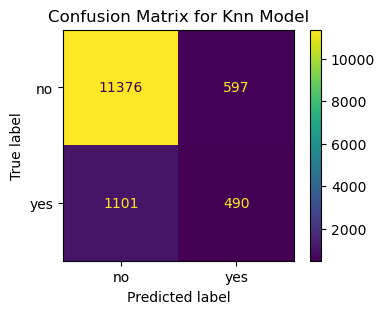

In [31]:
#[Modeling KNN]
#plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_knn, display_labels=knn.classes_)
ax.set(title='Confusion Matrix for Knn Model')
display.plot(ax=ax);

In [32]:
#[Modeling Decision Tree Model]
#train the model using train data, then use the test data to make prediction by Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

clf1b = DecisionTreeClassifier()
clf1b.fit(X_train1aT,y_train1a)

y_pred1b = clf1b.predict(X_test1aT)

In [40]:
#[Modeling Decision Tree Model]
#check the score of the model of decision tree
score_decisiontree = metrics.accuracy_score(y_test1a, y_pred1b)
print ('decision tree score :', score_decisiontree)

decision tree score : 0.8392804482453553


In [41]:
#[Modeling Decision Tree Model]
#find out the confusion matrix
cnf_matrix_decisiontree = metrics.confusion_matrix(y_test1a,y_pred1b)
print ('decision tree confusion matrix :', cnf_matrix_decisiontree)

decision tree confusion matrix : [[10799  1174]
 [ 1006   585]]


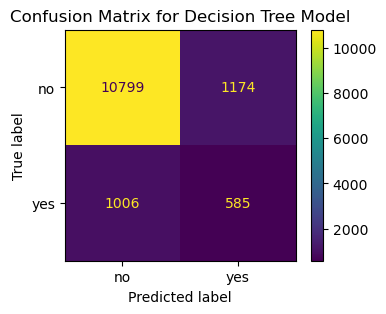

In [42]:
#[Modeling Decision Tree Model]
#plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_decisiontree, display_labels=clf1b.classes_)
ax.set(title='Confusion Matrix for Decision Tree Model')
display.plot(ax=ax);

In [43]:
#[Modeling SVM]
#train the model using train data, then use the test data to make prediction by SVM
from sklearn import svm
import numpy as np

clf1c = svm.SVC(kernel='linear')
clf1c.fit(X_train1aT,y_train1a)
#clf1c = svm.SVC(kernel='linear').fit(X_train1aT, y_train1a)

y_pred1c = clf1c.predict(X_test1aT)

In [44]:
#[Modeling SVM]
#check the score of the model of decision tree
score_svm = metrics.accuracy_score(y_test1a, y_pred1c)
print ('SVM score :', score_svm)

SVM score : 0.8827042170451195


In [45]:
#[Modeling SVM]
#find out the confusion matrix
cnf_matrix_svm = metrics.confusion_matrix(y_test1a,y_pred1c)
print ('SVM confusion matrix :', cnf_matrix_svm)

SVM confusion matrix : [[11973     0]
 [ 1591     0]]


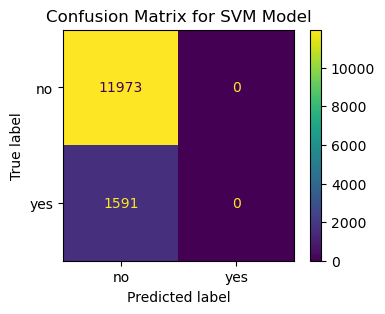

In [46]:
#[Modeling SVM]
#plot confusion matrix by heat map
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_svm, display_labels=clf1c.classes_)
ax.set(title='Confusion Matrix for SVM Model')
display.plot(ax=ax);

In [47]:
#[Modeling Logistic Regression]
#train the model using train data, then use the test data to make prediction by Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train1aT, y_train1a)

y_pred1d = logisticRegr.predict(X_test1aT)
y_pred1d

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [48]:
#[Modeling logistic regression]
#check the score of the model of decision tree
score_logisticregression = metrics.accuracy_score(y_test1a, y_pred1d)
print ('score logistic regression :', score_logisticregression)

score logistic regression : 0.8872014155116484


In [49]:
#[Modeling Logistic regression]
#find out the confusion matrix
cnf_matrix_logisticregression = metrics.confusion_matrix(y_test1a,y_pred1d)
print ('logistic regression confusion matrix :', cnf_matrix_logisticregression)

logistic regression confusion matrix : [[11772   201]
 [ 1329   262]]


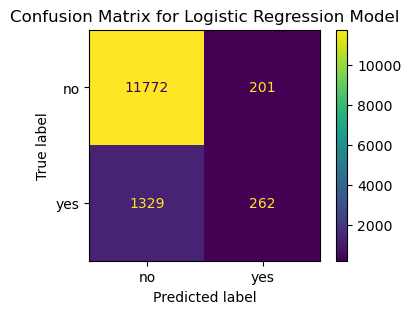

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_logisticregression, display_labels=logisticRegr.classes_)
ax.set(title='Confusion Matrix for Logistic Regression Model')
display.plot(ax=ax);

In [51]:
#[Model Accuracy]
#check the accuracy of Knn
true_neg, false_pos, false_neg, true_pos = cnf_matrix_knn.ravel()
cfm_accuracy = (true_neg+true_pos) / (true_neg+false_pos+false_neg+true_pos)
print ('Model Knn')
print ('accuracy of knn confusion matrix :', cfm_accuracy * 100, '%')
print ('accuracy score by sklearn :', score_knn * 100, '%')

Model Knn
accuracy of knn confusion matrix : 87.48156885874373 %
accuracy score by sklearn : 87.48156885874373 %


In [52]:
#[Model Decision Tree]
#check the accuracy of DT
true_neg, false_pos, false_neg, true_pos = cnf_matrix_decisiontree.ravel()
cfm_accuracy = (true_neg+true_pos) / (true_neg+false_pos+false_neg+true_pos)
print ('Model Decision Tree')
print ('accuracy of knn confusion matrix :', cfm_accuracy, '%')
print ('accuracy score by sklearn :', score_decisiontree, '%')

Model Decision Tree
accuracy of knn confusion matrix : 0.8392804482453553 %
accuracy score by sklearn : 0.8392804482453553 %


In [53]:
#[Model SVM]
#check the accuracy of SVM
true_neg, false_pos, false_neg, true_pos = cnf_matrix_svm.ravel()
cfm_accuracy = (true_neg+true_pos) / (true_neg+false_pos+false_neg+true_pos)
print ('Model SVM')
print ('accuracy of knn confusion matrix :', cfm_accuracy, '%')
print ('accuracy score by sklearn :', score_svm, '%')

Model SVM
accuracy of knn confusion matrix : 0.8827042170451195 %
accuracy score by sklearn : 0.8827042170451195 %


In [54]:
#[Model Logistic Regression]
#check the accuracy of logistic Regression
true_neg, false_pos, false_neg, true_pos = cnf_matrix_logisticregression.ravel()
cfm_accuracy = (true_neg+true_pos) / (true_neg+false_pos+false_neg+true_pos)
print ('Model Logistic Regression')
print ('accuracy of knn confusion matrix :', cfm_accuracy, '%')
print ('accuracy score by sklearn :', score_logisticregression, '%')

Model Logistic Regression
accuracy of knn confusion matrix : 0.8872014155116484 %
accuracy score by sklearn : 0.8872014155116484 %


In [220]:
#[Analysis]
# teh confusion matrix suggested that we should use logistic regression model 
# to predict the subscription of a term deposit
#as value is 0.8827 which is the highest number, this also means the accuracy rate of
#this model is 88.72%, this is based on the test dataset of 31646 rows. 
#As the accuracy rate of the predict model is high, we would expect this model to be ready
# to be used in production environment